# Artificial Neural Networks with Keras

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

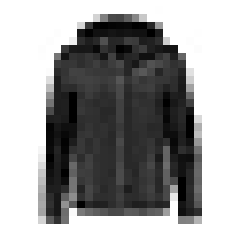

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train[0]

4

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

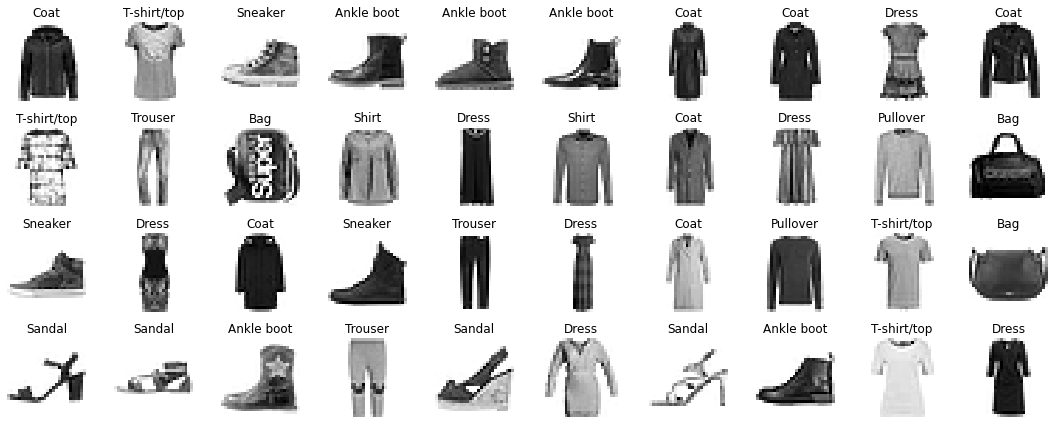

In [14]:
n_rows = 4
n_cols = 10

plt.figure(figsize = (n_cols * 1.5, n_rows * 1.5))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.tight_layout()
plt.show()

## CREATING THE MODEL USING THE SEQUENTIAL API

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [16]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]

In [21]:
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

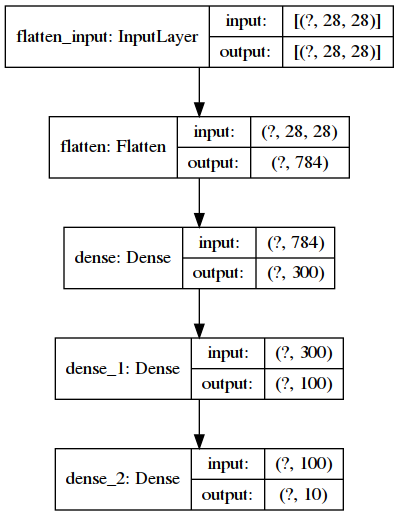

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.00315184,  0.04630247, -0.00316229, ...,  0.01646411,
        -0.02042289, -0.03946767],
       [ 0.05136564, -0.02859101,  0.04602057, ...,  0.00757318,
        -0.06618038, -0.05471007],
       [ 0.04691272, -0.0026296 ,  0.07020119, ..., -0.04660381,
        -0.03666015,  0.02501245],
       ...,
       [ 0.012565  ,  0.05742019, -0.06992737, ...,  0.04477017,
         0.03706373,  0.05789621],
       [-0.06575304,  0.07304707,  0.05090609, ...,  0.03085814,
        -0.00268235, -0.05790088],
       [ 0.02920057, -0.00429318,  0.01269243, ...,  0.01845723,
        -0.05683304,  0.01923399]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

## TRAINING AND EVALUATING THE MODEL

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2269 - accuracy: 0.9185 - val_loss: 0.3038 - val_accuracy: 0.8916
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2238 - accuracy: 0.9194 - val_loss: 0.3126 - val_accuracy: 0.8844
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2199 - accuracy: 0.9214 - val_loss: 0.3168 - val_accuracy: 0.8820
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2169 - accuracy: 0.9221 - val_loss: 0.3039 - val_accuracy: 0.8900
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2132 - accuracy: 0.9221 - val_loss: 0.3083 - val_accuracy: 0.8904
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2103 - accuracy: 0.9248 - val_loss: 0.3040 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2070 - accuracy: 0.9251 - val_loss: 0.3096 - val_accuracy:

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

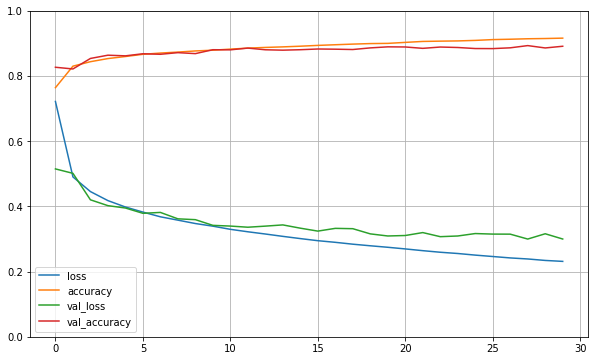

In [38]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.ylim(0,1)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8798


[0.33416253328323364, 0.879800021648407]